# 2018 Results Analysis

This notebook contains some analysis of the results of the 2018 season. It includes all Wednesday and Friday evening races over the season but excludes mayhems, pursuit races, club champs and winter series.

Start by defining some useful functions.

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


column_headings = ["HelmName", "Class", "PY", "SailNo", "Fleet", "Rank", "Elapsed", "Corrected", "Points", "Reg No.", "Reg Date"]
alternative_headings = ["HelmName", "Class", "PY", "SailNo", "Fleet", "Rank", "Place", "Points", "Reg No.", "Reg Date"]

def scrape_race(url):
    """Scrape all the results for a single race."""
    print(url)
    with urllib.request.urlopen(url) as response:
       html = response.read()
    
    soup = BeautifulSoup(html)
    
    tables = soup.findAll('table')
    return tables[:4]


def get_dataframe_from(table):
    """Turn a table into a data frame."""
    table_rows = table.find_all('tr')
    l = []
    for tr in table_rows[1:]:
        td = tr.find_all('td')
        row = [tr.text for tr in td]
        l.append(row)
        
    # Different column headers are used if there were no results recorded in a fleet.
    if l and len(l[0]) == 11:        
        df = pd.DataFrame(l, columns=column_headings)
    else:
        df = pd.DataFrame(l, columns=alternative_headings)
        
    return df

Import all results for all Wednesday and Friday races.

In [2]:
base_url = 'https://www.warsashsc.org.uk/results/18'
series = ['wa', 'wb', 'wc', 'fa', 'fb', 'fc']

all_races_frames = []

for s in series:
    for i in range(1, 9):
        try:
            race = scrape_race(base_url + s + str(i) + '.htm')
        except:
            print('No racing')
        
        for table in race:
            df = get_dataframe_from(table)
            df['Day'] = s[0]
            df['Series'] = s[1]
            df['Race'] = i
            
            all_races_frames.append(df)
            
all_races = pd.concat(all_races_frames, sort=True)

https://www.warsashsc.org.uk/results/18wa1.htm
https://www.warsashsc.org.uk/results/18wa2.htm
https://www.warsashsc.org.uk/results/18wa3.htm
https://www.warsashsc.org.uk/results/18wa4.htm
https://www.warsashsc.org.uk/results/18wa5.htm
https://www.warsashsc.org.uk/results/18wa6.htm
https://www.warsashsc.org.uk/results/18wa7.htm
https://www.warsashsc.org.uk/results/18wa8.htm
https://www.warsashsc.org.uk/results/18wb1.htm
https://www.warsashsc.org.uk/results/18wb2.htm
https://www.warsashsc.org.uk/results/18wb3.htm
https://www.warsashsc.org.uk/results/18wb4.htm
https://www.warsashsc.org.uk/results/18wb5.htm
https://www.warsashsc.org.uk/results/18wb6.htm
https://www.warsashsc.org.uk/results/18wb7.htm
https://www.warsashsc.org.uk/results/18wb8.htm
https://www.warsashsc.org.uk/results/18wc1.htm
https://www.warsashsc.org.uk/results/18wc2.htm
https://www.warsashsc.org.uk/results/18wc3.htm
https://www.warsashsc.org.uk/results/18wc4.htm
https://www.warsashsc.org.uk/results/18wc5.htm
No racing
htt

## Display Some Interesting Stats for all Races in 2018

In [3]:
print('There were a total of %i results recorded.' % len(all_races.index))

print('There were a total of %i OCSs.' % (all_races['Elapsed'] == 'OCS').sum())

print('There were a total of %i duties recorded.' %(all_races['Elapsed'] == 'Duty').sum())

print('There were a total of %i DNFs recorded.' % (all_races['Elapsed'] == 'DNF').sum())

excluding_duties = all_races[~all_races['Elapsed'].isin(['Duty'])]
print('There were %i results posted excluding duties.' % len(excluding_duties.index))

only_finishes = all_races[~all_races['Elapsed'].isin(['Duty', 'OCS', 'DNE', 'DNF', 'DSQ'])]
print('There were %i finishes recorded.' % len(only_finishes.index))

There were a total of 1468 results recorded.
There were a total of 22 OCSs.
There were a total of 95 duties recorded.
There were a total of 154 DNFs recorded.
There were 1373 results posted excluding duties.
There were 1188 finishes recorded.


## Class Analysis

In [4]:
print('%i different classes raced in 2018' % excluding_duties['Class'].nunique())

37 different classes raced in 2018


In [5]:
classes_frequency = excluding_duties['Class'].value_counts()
py_by_class = {}

for c in excluding_duties['Class'].unique():
    py_by_class[c] = excluding_duties.loc[excluding_duties['Class'] == c, 'PY'].iloc[0]

print(py_by_class)
print(classes_frequency)

{'WAYFARER': '1102', 'RS AERO 7': '1068', 'NAT 12': '1064', 'FINN': '1051', 'RS 200': '1046', 'HADRON H2': '1037', 'BLAZE': '1027', 'KESTREL': '1038', 'STREAKER': '1128', 'LASER 4.7': '1207', 'LASER RADIAL': '1142', 'WANDERER': '1190', 'MIRROR': '1390', 'TOPPER': '1358', 'RS 400': '942', 'D ONE': '948', 'BUZZ': '1023', 'LASER 2000': '1107', 'LASER': '1098', 'Hobie 405': '1089', 'RS FEVA XL': '1240', 'RS 300': '972', 'CONTENDER': '969', 'TASAR': '1015', 'D ZERO': '1029', '420': '1110', 'ALBACORE': '1038', 'D ZERO BLUE': '1064', 'HOBIE 405': '1089', 'OSPREY': '928', 'GRADUATE': '1129', 'LASER PICO': '1330', 'LASER STRATOS': '1100', 'RS 100 8.4': '1008', 'LASER VAGO XD': '1071', 'RS AERO 5': '1129', 'LARK': '1070'}
RS 400           186
BLAZE            103
RS AERO 7        102
TOPPER            97
WAYFARER          95
FINN              95
LASER 4.7         90
BUZZ              66
LASER RADIAL      60
LASER PICO        43
RS 200            42
LASER 2000        40
HADRON H2         35
WANDE

<BarContainer object of 37 artists>

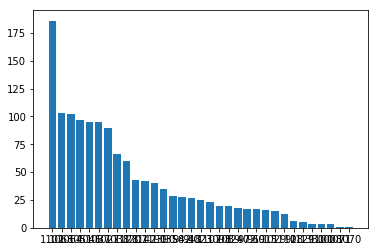

In [7]:
plt.bar(np.arange(len(classes_frequency)), excluding_duties['Class'].value_counts())